In [140]:
from nsfg import ReadFemResp
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr

In [30]:
# 1
resp = ReadFemResp()

In [117]:
# 2
timesmar = resp["timesmar"]
jintendn = resp["jintendn"]

timesmar_without_nan = timesmar.dropna()
jintendn_without_nan = jintendn.dropna()

std_timesmar = np.std(timesmar_without_nan) 
mean_timesmar = np.mean(timesmar_without_nan)

std_jintendn = np.std(jintendn_without_nan)
mean_jintendn = np.mean(jintendn_without_nan)

Normalized Probability Density Function for TIMESMAR:


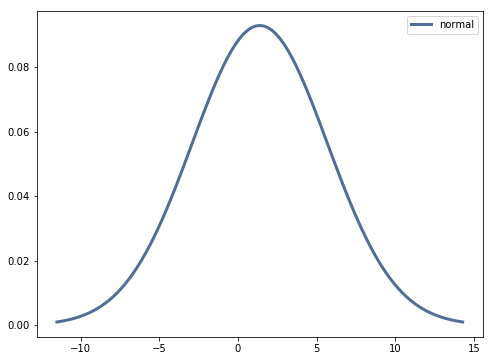

Normalized Probability Density Function for JINTENDN:


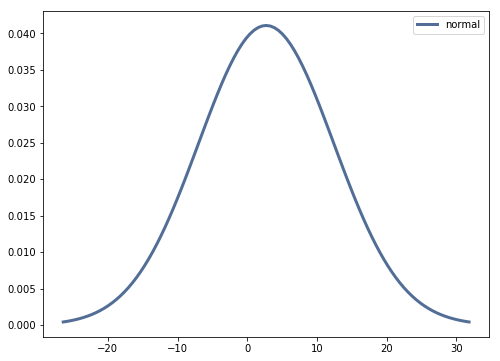

In [118]:
# 3
pdf_timesmar = thinkstats2.NormalPdf(mean_timesmar, std_timesmar)
thinkplot.Pdf(pdf_timesmar, label='normal')
print("Normalized Probability Density Function for TIMESMAR:")
thinkplot.Show()

pdf_jintendn = thinkstats2.NormalPdf(mean_jintendn, std_jintendn)
thinkplot.Pdf(pdf_jintendn, label='normal')
print("Normalized Probability Density Function for JINTENDN:")
thinkplot.Show()

#4 Gaussian distribution gives us a probabilistic intrepretation of the data set it represents. The x-axis is the values in the data set and the y-axis is the probabilities of these values to be in the data set. The x value of the peak point gives us the mean of the data set, meaning the value what has the highest probability to be in the data set is the mean value. As seen as we go to minus and plus infinity the y-axis value which is the probability gets closer to zero since there are no examples of these values in the data set. Since standart deviation gives us the variability of a data set, wider gaussian distrubutions have higher standart deviations so we can say that JINTENDN has a higher standart deviation. So we can say TIMESMAR has a more stabil change in values. So to sum up gaussian distrubiton function gives us the probability of x to be in the data set it represents for the input x. Since normalized the integral from minus infinity to plus infinity is 1.

Probability Density Function for TIMESMAR:


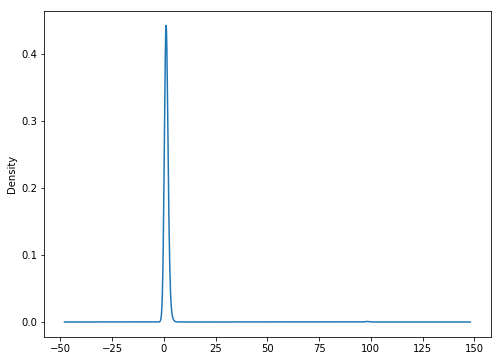

Probability Density Function for JINTENDN:


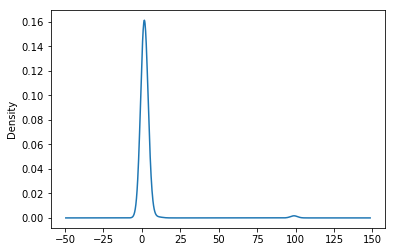

In [74]:
# 5
timesmar_without_nan.plot.density()
print("Probability Density Function for TIMESMAR:")
plt.show()
jintendn_without_nan.plot.density()
print("Probability Density Function for JINTENDN:")
plt.show()

In [82]:
# 6

def RawMoment(xs, k):
    return np.sum(x**k for x in xs) / len(xs)
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return np.sum((x - mean)**k for x in xs) / len(xs)
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k
def Skewness(xs):
    return StandardizedMoment(xs, 3)
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

print("TIMESMAR skewness:", Skewness(timesmar_without_nan))
print("JINTENDN skewness:", Skewness(jintendn_without_nan))

print("TIMESMAR Pearson median skewness:", PearsonMedianSkewness(timesmar_without_nan))
print("JINTENDN Pearson median skewness:", PearsonMedianSkewness(jintendn_without_nan))

TIMESMAR skewness: 22.2193072207
JINTENDN skewness: 9.68691405793
TIMESMAR Pearson median skewness: 0.27025442021
JINTENDN Pearson median skewness: 0.527036842972


#7 For normalized distribution we get a classical bell shaped curve which is symetrical but the real distribution is not like that. Skewness is a measurement for the asymmetry of a data set. If skewness is positive we say that the mean is greater than the mode and if the skewness is negative we say that the mean is less than the mode. Here we got both positive skewness but a bigger skewness means the mean is much greater than mode than the other data set. For these data sets the distributions have longer tails on the right hand side.

And the median skewness is similiar but gives us the relation between the mean and the median. In this situation we can again say the median of the JINTENDN data set is much bigger than the difference between the median of TIMESMAR and the mean of TIMESMAR.

Not Jittered


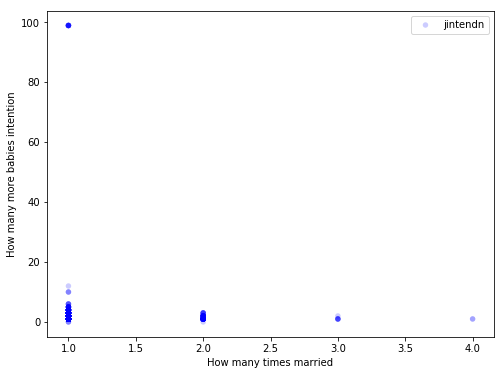

Jittered


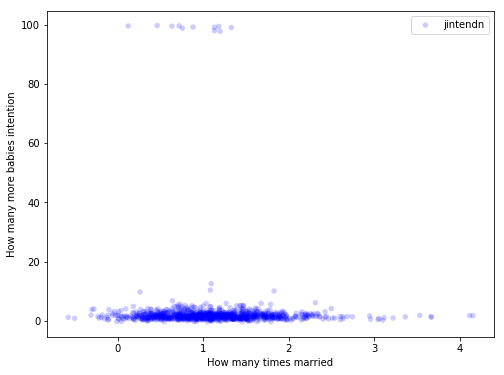

In [94]:
# 8
thinkplot.Scatter(timesmar, jintendn)
print("Not Jittered")
thinkplot.Show(alpha=0.01, s=2, xlabel='How many times married',ylabel='How many more babies intention')
timesmar_jittered = thinkstats2.Jitter(timesmar)
jintendn_jittered = thinkstats2.Jitter(jintendn)
thinkplot.Scatter(timesmar_jittered, jintendn_jittered)
print("Jittered")
thinkplot.Show(alpha=0.01, s=2, xlabel='How many times married',ylabel='How many more babies intention')

[ 1.  1.  1.]
[ 0.5175  1.      1.    ]


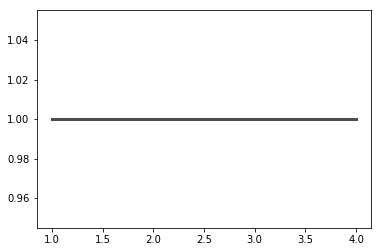

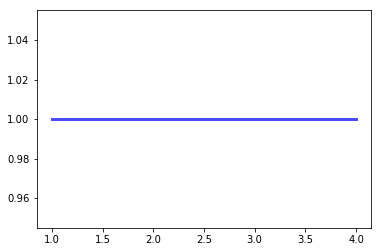

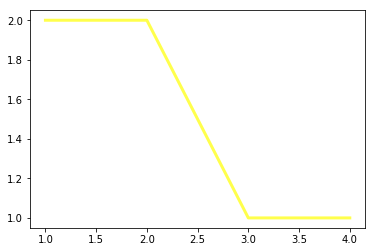

In [155]:
# 9
print(np.percentile(timesmar_without_nan, [.25, .50, .75]))
print(np.percentile(jintendn_without_nan, [.25, .50, .75]))

df = resp.dropna(subset=['timesmar', 'jintendn'])
bins = np.arange(0, 101, 1)
indices = np.digitize(df.timesmar, bins)
groups = df.groupby(indices)
timemar = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]
colors = ["black","blue","yellow"]
for i, percent in enumerate([25, 50, 75]):
    jintend = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(timemar, jintend, label=label, color=colors[i])
    plt.show()

#10 ## Explanation for percentile

In [148]:
# 12
total = pd.concat([timesmar,jintendn], axis=1)
total_without_nan = total.dropna()
timesmar_for_corr = total_without_nan["timesmar"]
jintendn_for_corr = total_without_nan["jintendn"]
print("Pearson Correlation:", pearsonr(timesmar_for_corr, jintendn_for_corr))
print()
print("Spearman Correlation:")
print(spearmanr(timesmar_for_corr, jintendn_for_corr))

Pearson Correlation: (-0.036523466523859391, 0.23171606728546632)

Spearman Correlation:
SpearmanrResult(correlation=-0.083377477903482558, pvalue=0.0062565986838944319)


#13
The Pearson and Spearman correlation coefficients can range in value from −1 to +1. For the Pearson correlation coefficient to be +1, when one variable increases then the other variable increases by a consistent amount. This relationship forms a perfect line. The Spearman correlation coefficient is also +1 in this case.
If the relationship is that one variable increases when the other increases, but the amount is not consistent, the Pearson correlation coefficient is positive but less than +1. The Spearman coefficient still equals +1 in this case.
When a relationship is random or non-existent, then both correlation coefficients are nearly zero.
If the relationship is a perfect line for a decreasing relationship, then both correlation coefficients are −1.
If the relationship is that one variable decreases when the other increases, but the amount is not consistent, then the Pearson correlation coefficient is negative but greater than −1. The Spearman coefficient still equals −1 in this case
Correlation values of −1 or 1 imply an exact linear relationship, like that between a circle's radius and circumference. However, the real value of correlation values is in quantifying less than perfect relationships. Finding that two variables are correlated often informs a regression analysis which tries to describe this type of relationship more.

#14 JINTENDN has a higher standart deviation than TIMESPAR so we can say that it changes more violently, so it is a more diverse data set. From the relationship graphics we see that the people who have been married just once has an expactation of having more kids so this is an interesting result. We also see that as expected having more than 1 or 2 marriages is not very common and also no marriages is more rare than having at least one marriage. From the mean of the data sets we can say that in both data sets the values are close to each other so thay are about around the value 1.